# Projeto de conclusão de Módulo Machine Learning II
## Integrantes:
#### Assuero Meira
#### Leandro Republicano
#### Leticia da Luz
#### Orestes Dos Santos
---
## Objetivos do Projeto:
- Com o conhecimento adquirido em análise e ciência de dados até o momento, este projeto tem como finalidade avaliar um dataset sob três perspectivas:
  - **Análise Exploratória de Dados (EDA):** Entender a estrutura, as características e as tendências presentes nos dados.
  - **Análise de Segmentação:** Agrupar os dados em segmentos significativos para identificar padrões e comportamentos específicos.
  - **Análise Preditiva:** Desenvolver um modelo preditivo para antecipar eventos ou comportamentos futuros.

---

## Dataset: Internet Service Provider Customer Churn

**Link:** https://www.kaggle.com/datasets/mehmetsabrikunt/internet-service-churn/data

**Resumo:**
- **Contexto:** Existe uma grande competição entre os provedores de internet. Para aumentar a receita, os provedores precisam de mais assinantes, mas manter os clientes existentes é mais crucial do que conseguir novos. Assim, os provedores querem saber quais clientes têm maior probabilidade de cancelar o serviço, um fenômeno conhecido como churn. Se souberem quem está prestes a cancelar, podem tentar retê-los com promoções ou ofertas especiais.
- **Conteúdo:** Este dataset contém dados de clientes que usam serviços de internet e indica se o cliente cancelou o serviço (churn) ou não.
---
## Desta forma, para este projeto visamos:
- **Previsão de Churn:** Criar um modelo capaz de prever quando um cliente está prestes a cancelar seu serviço.
- **Segmentação de Clientes:** Agrupar clientes que cancelaram o serviço usando técnicas de clusterização. Ao identificar grupos de clientes com características e comportamentos semelhantes, é possível desenvolver estratégias de marketing específicas para reter esses clientes.
---
## 1 - Análise Exploratória de Dados (EDA):

In [1]:
#Importação de bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu


In [2]:
# Montando o Google Drive no ambiente do Colab.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Caminho do arquivo
caminho_csv = '/content/drive/MyDrive/projeto_ML/projeto_ML_2/internet_service_churn.csv'

In [4]:
# Carregando o arquivo CSV usando Pandas
df_churn = pd.read_csv(caminho_csv)

In [5]:
display(df_churn)

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1


### Dicionário de Dados

- Dados coletados entre 2007 - 2019
- **id** - Identificação do cliente
- **is_tv_subscriber** - É assinante de TV (0 = Não, 1 = Sim)
- **is_movie_package_subscriber** - É assinante de pacote de filmes (0 = Não, 1 = Sim).
- **subscription_age** - Tempo de assinatura (anos)
- **bill_avg** - Média de fatura dos últimos 3 meses
- **remaining_contract** - Contrato restante em anos(cancelamento antes do término gera multa). Se valor nulo, cliente não possui contrato pois optou por contratar o serviço mensalmente.
- **service_failure_count** - Contagem de falhas de serviço nos últimos 3 meses
- **download_avg** - Média de download em GB nos últimos 3 meses
- **upload_avg** - Média de upload em GB nos últimos 3 meses
- **download_over_limit** - Download acima do limite, se o cliente ultrapassar o limite de download estabelecido no contrato, devem pagar excedente
- **churn** - Cancelamento. Indica se o cliente cancelou o serviço (0 = Não, 1 = Sim).

In [6]:
#Verificando valores nulos
df_churn.isnull().sum()

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

In [7]:
#Resumo geral das variáveis
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


In [8]:
#Verificando linhas duplicadas pela coluna identificadora
df_churn['id'].duplicated().sum()

0

In [9]:
#Valores únicos para coluna Target
df_churn['churn'].value_counts()

churn
1    40050
0    32224
Name: count, dtype: int64

# Análise Univariada
### Vamos iniciar nossa análise exploratória com a coluna 'is_tv_subscriber', já que a coluna de ID simplesmente fornece um identificador único para cada cliente.

## Coluna 'is_tv_subscriber'

In [10]:
#Valores para coluna 'is_tv_subscriber'
df_churn['is_tv_subscriber'].value_counts()

is_tv_subscriber
1    58922
0    13352
Name: count, dtype: int64

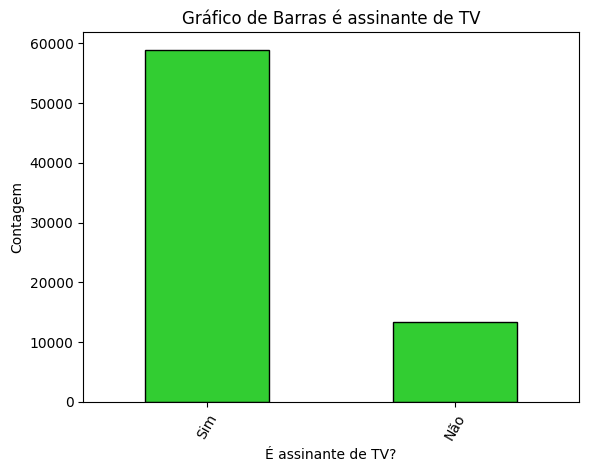

In [11]:
# Criando um gráfico de barras para coluna 'is_tv_subscriber'
ax = df_churn['is_tv_subscriber'].value_counts().plot(kind='bar', color = '#32CD32', edgecolor = 'black')

# Modificando os rótulos dos eixos x
ax.set_xticklabels(['Sim', 'Não'], rotation = 60)

plt.title('Gráfico de Barras é assinante de TV')
plt.xlabel('É assinante de TV?')
plt.ylabel('Contagem')
plt.show()

In [12]:
#Tabela de contigência
tab_cont_tv = pd.crosstab(df_churn['churn'], df_churn['is_tv_subscriber'])
tab_cont_tv

is_tv_subscriber,0,1
churn,,
0,1386,30838
1,11966,28084


In [13]:
#Porcentagem de cancelamento assinantes de TV/não assinantes
pd.crosstab(df_churn['churn'], df_churn['is_tv_subscriber'], normalize='index') * 100

is_tv_subscriber,0,1
churn,,
0,4.301142,95.698858
1,29.877653,70.122347


- O gráfico de barras e o método value_counts() mostras a contagem de assinantes de TV versus não assinantes:
  - Sim (1): Aproximadamente 58.922 assinantes.
  - Não (0): Aproximadamente 13.352 não assinantes.
- Tabela de Contingência: Churn vs. Assinatura de TV:
  - Clientes que não são assinantes de TV e não cancelaram (churn = 0): 1.386, aproximadamente 4,3%;
  - Clientes que são assinantes de TV e não cancelaram (churn = 0): 30.838,
  aproximadamente 95,7%;

  - Clientes que não são assinantes de TV e cancelaram (churn = 1): 11.966, aproximadamente 30%;
  - Clientes que são assinantes de TV e cancelaram (churn = 1): 28.084, aproximadamente 70,12%

- **Entre os clientes que não são assinantes de TV, uma proporção significativa (11.966 de 13.352) cancelou o serviço. Isso sugere que não ser assinante de TV pode estar associado a uma maior probabilidade de churn.**

- **Entre os clientes que são assinantes de TV, um número considerável (28.084 de 58.922) também cancelou o serviço. Embora a quantidade seja alta, a proporção de churn é menor comparada aos não assinantes.**

- **Vamos realizar um teste de qui-quadrado para verificar estas suposições:**
  - O teste de qui-quadrado é uma técnica estatística utilizada para testar a independência entre duas variáveis categóricas ou para verificar a adequação de uma distribuição observada em relação a uma distribuição esperada.
  - Existem alguns pressupostos que devem ser atendidos para que os resultados do teste de qui-quadrado sejam válidos:
    - Dados Categóricos: O teste de qui-quadrado é adequado para variáveis categóricas (nominais ou ordinais). Os dados devem ser organizados em uma tabela de contingência, onde as frequências observadas são comparadas com as frequências esperadas.
    - Tamanho da Amostra: Geralmente, recomenda-se que cada célula da tabela de contingência tenha uma frequência esperada de pelo menos 5 para garantir a validade do teste.
    - As observações devem ser independentes umas das outras. Ou seja cada observação deve ser coletada de forma independente.
    
- H0 (Hipótese Nula) = Não há diferença significativa entre as frequências observadas e esperadas, o que, por sua vez, sugere que as variáveis são independentes.
- HA (Hipótese Alternativa) = Há diferença significativa entre as frequências observadas e esperadas,ou seja, as variáveis não são independentes, há associação.
- α=0,05: Vamos utilizar o nível de significância mais comumente usado


In [14]:
chi2, p_valor, graus_liberdade, frequencias_esperadas = chi2_contingency(tab_cont_tv)
print(f'Chi-quadrado: {chi2}')
print(f'P-valor: {p_valor:.5f}')
print(f'Frequências esperadas: \n{frequencias_esperadas}')

Chi-quadrado: 7754.035022664976
P-valor: 0.00000
Frequências esperadas: 
[[ 5953.10689875 26270.89310125]
 [ 7398.89310125 32651.10689875]]


- **O valor de p obtido é menor que o nível de significância estabelecido a priori de 0.05. Diante desse resultado, rejeitamos a hipótese nula de que as variáveis são indepedentes. Portanto, com base no valor de p obtido, podemos concluir que há uma associação estatisticamente significativa entre as variáveis.** Isso indica que, dentro deste conjunto de dados e ao nível de confiança usual de 95%, foi encontrada uma associação significativa entre as duas variáveis.
- O p-valor indica que as diferenças observadas entre as frequências esperadas e observadas são muito grandes para serem atribuídas ao acaso. Isso sugere uma forte evidência de que há uma associação significativa entre a assinatura de pacotes de TV e o churn. Em outras palavras, o status de assinatura de pacotes de TV está relacionado ao fato de um cliente cancelar ou não o serviço.

## Coluna 'is_movie_package_subscriber'

In [15]:
#Valores para coluna 'is_movie_package_subscriber'
df_churn['is_movie_package_subscriber'].value_counts()

is_movie_package_subscriber
0    48089
1    24185
Name: count, dtype: int64

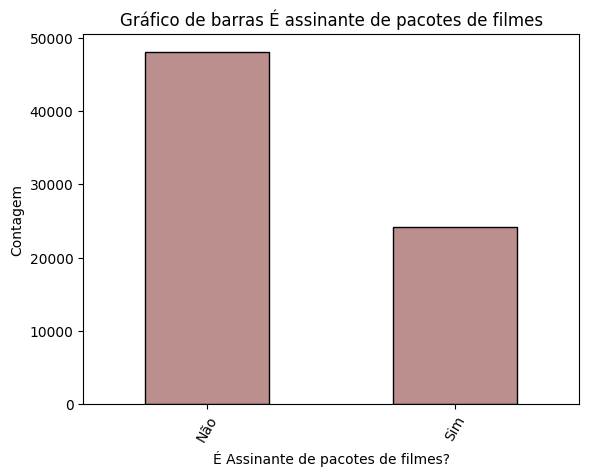

In [16]:
# Criando um gráfico de barras para coluna 'is_movie_package_subscriber'
ax = df_churn['is_movie_package_subscriber'].value_counts().plot(kind = 'bar', edgecolor = 'black', color = '#BC8F8F')
ax.set_xticklabels(['Não', 'Sim'], rotation = 60)

plt.title('Gráfico de barras É assinante de pacotes de filmes')
plt.xlabel('É Assinante de pacotes de filmes?')
plt.ylabel('Contagem')
plt.show()


In [17]:
#Tabela de contigência
tab_cont_movie = pd.crosstab(df_churn['churn'], df_churn['is_movie_package_subscriber'])
tab_cont_movie

is_movie_package_subscriber,0,1
churn,,
0,16234,15990
1,31855,8195


In [18]:
#Porcentagem de cancelamento assinantes dos pacotes de filmes/ não assinantes
pd.crosstab(df_churn['churn'], df_churn['is_movie_package_subscriber'], normalize='index')*100

is_movie_package_subscriber,0,1
churn,,
0,50.378600,49.621400
1,79.538077,20.461923


- O gráfico de barras e o método value_counts() mostras a contagem de assinantes de Pacote de Filmes versus não assinantes:
  - Sim (1): 24.185 clientes são assinantes de pacotes de filmes.
  - Não (0): 48.089 clientes não são assinantes de pacotes de filmes.

- Tabela de Contingência: Churn vs. de Pacote de Filmes:
  - Clientes que não deram churn (0):
    - Aproximadamente 50.38% não são assinantes de pacotes de filmes.
    - Aproximadamente 49.62% são assinantes de pacotes de filmes.
  - Clientes que deram churn (1):
    - Aproximadamente 79.54% não são assinantes de pacotes de filmes.
    - Aproximadamente 20.46% são assinantes de pacotes de filmes.

- **Esses resultados indicam que há uma diferença considerável na proporção de assinantes de pacotes de filmes entre os clientes que deram churn e os que não deram. Notamos que uma maior proporção de clientes que deram churn não são assinantes de pacotes de filmes em comparação com aqueles que não deram churn. Isso sugere uma possível correlação entre a assinatura de pacotes de filmes e a retenção de clientes.**

- Vamos realizar um teste de qui-quadrado para verificar estas suposições:
  - H0 (Hipótese Nula) = Não há diferença significativa entre as frequências observadas e esperadas, o que, por sua vez, sugere que as variáveis são independentes.
  - HA (Hipótese Alternativa) = Há diferença significativa entre as frequências observadas e esperadas,ou seja, as variáveis não são independentes, há associação.
  - α=0,05: Vamos utilizar o nível de significância mais comumente usado



In [19]:
chi2, p_valor, graus_liberdade, frequencias_esperadas = chi2_contingency(tab_cont_movie)
print(f'Chi-quadrado: {chi2}')
print(f'P-valor: {p_valor:.5f}')
print(f'Frequências esperadas: \n{frequencias_esperadas}')

Chi-quadrado: 6817.863309980164
P-valor: 0.00000
Frequências esperadas: 
[[21440.90455766 10783.09544234]
 [26648.09544234 13401.90455766]]


- **O valor de p obtido é menor que o nível de significância estabelecido a priori de 0.05. Diante desse resultado, rejeitamos a hipótese nula de que as variáveis são indepedentes. Portanto, com base no valor de p obtido, podemos concluir que há uma associação estatisticamente significativa entre as variáveis.** Isso indica que, dentro deste conjunto de dados e ao nível de confiança usual de 95%, foi encontrada uma associação significativa entre as duas variáveis.
- Um p-valor tão pequeno indica que é altamente improvável que as frequências observadas sejam devidas ao acaso. Portanto, rejeitamos a hipótese nula e concluímos que existe uma associação significativa entre churn e a assinatura de pacotes de filmes.

## Coluna 'subscription_age'

In [20]:
#Verificando a estatísticas da coluna 'subscription_age'
pd.DataFrame(df_churn['subscription_age'].describe())

,subscription_age
count,72274.000000
mean,2.450051
std,2.034990
min,-0.020000
25%,0.930000
50%,1.980000
75%,3.300000
max,12.800000


In [21]:
#valor  que mais aparece
df_churn['subscription_age'].mode()

0    1.98
Name: subscription_age, dtype: float64

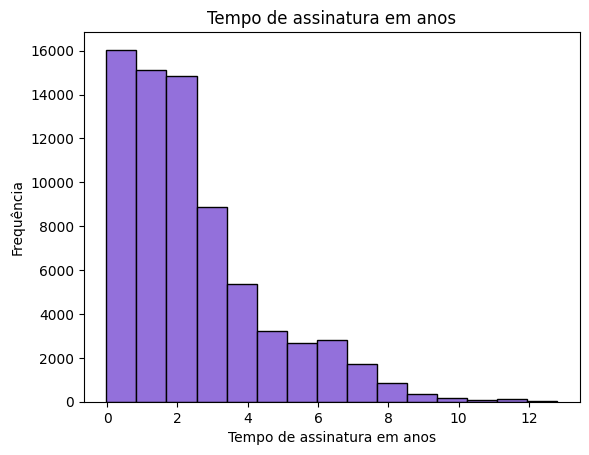

In [22]:
#Histograma
plt.hist(df_churn['subscription_age'], color = '#9370DB', edgecolor = 'black', bins= 15)
plt.title('Tempo de assinatura em anos')
plt.xlabel('Tempo de assinatura em anos')
plt.ylabel('Frequência')
plt.show()


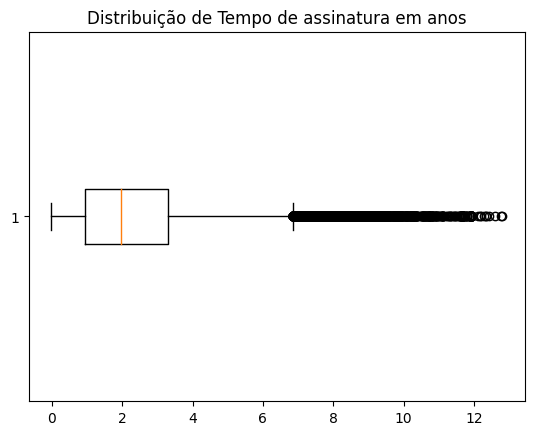

In [23]:
#Boxplot
plt.boxplot(df_churn['subscription_age'], vert=False)
plt.title('Distribuição de Tempo de assinatura em anos')
plt.show()

- **Interpretação das Estatísticas:**
  - Média e Mediana: A média é maior que a mediana, que por sinal é igual à moda, indicando uma distribuição assimétrica positiva (à direita).Isso indica que a cauda direita da distribuição é mais longa, e a maioria dos valores está concentrada à esquerda da média. Este padrão também é relevado pelo histograma, que indica que a maioria dos clientes tem um tempo de assinatura entre 0 e 3 anos, com uma diminuição gradual no número de clientes conforme o tempo de assinatura aumenta, indicando que poucos clientes têm tempos de assinatura muito longos.
  - Desvio Padrão: O desvio padrão de 2.03 anos indica uma variação considerável no tempo de assinatura dos clientes.
  - Valores Extremos: O valor mínimo negativo (-0.02) pode indicar um erro nos dados, já que o tempo de assinatura não deve ser negativo. O valor máximo de 12.80 anos mostra que alguns clientes mantêm suas assinaturas por longos períodos.

- **Boxplot:**
  - Há uma presença significativa de valores atípicos além do limite superior, o limite superior em um boxplot é calculado como Q3 (terceiro quartil) + 1,5 * IQR (Intervalo Interquartil). Ele estabelece o limite superior além do qual um valor é considerado um valor atípico.

  - **Os valores negativos e os outliers serão tratados no momento da modelagem.**


### Para verificar se há diferença estatisticamente significativa entre o grupo que cancelou ou não o produto em relação a coluna 'subscription_age', vamos utilizar o teste Mann-Whitney U.

- O teste de Mann-Whitney é uma alternativa não paramétrica ao teste t de Student e é utilizado para comparar dois grupos independentemente da forma da distribuição. Ele não assume normalidade nem homocedasticidade, sendo apropriado para dados que não atendem aos pressupostos do teste t, como é o caso desta variável, (há uma diminuição gradual no número de clientes conforme o tempo de assinatura aumenta, este padrão indica que a distribuição não é normal.)
-  Ele compara a distribuição das classificações das duas amostras para determinar se uma amostra tende a ter valores maiores ou menores que a outra.

- Hipótese Nula (H0): As distribuições das duas populações são iguais.
- Hipótese Alternativa (Ha): As distribuições das duas populações são diferentes.
- α=0,05: Vamos utilizar o nível de significância mais comumente usado

In [24]:
# Separando os dados em dois grupos
churn0 = df_churn[df_churn['churn'] == 0]
churn1 = df_churn[df_churn['churn'] == 1]

In [25]:
print(churn0.shape, churn1.shape)

(32224, 11) (40050, 11)


In [26]:
# Realizando o teste de Mann-Whitney
estatistica_u, p_valor = mannwhitneyu(churn0['subscription_age'], churn1['subscription_age'], alternative='two-sided') #teste bicaudal

print('Estatística U:', estatistica_u)
print('P-valor:', p_valor)

Estatística U: 689056790.0
P-valor: 1.5154722530588199e-55


 Com base nesse resultado (valor de p < 0.05), nós  rejeitamos a hipótese nula de que não há diferença significativa entre as duas amostras.
 - **Isso significa que há diferença estatisticamente significativa no tempo de assinatura entre os grupos de churn e não churn.**

  ## Coluna 'bill_avg'

In [27]:
#Resumo estatístico da variável 'bill_avg
pd.DataFrame(df_churn['bill_avg'].describe())

,bill_avg
count,72274.000000
mean,18.942483
std,13.215386
min,0.000000
25%,13.000000
50%,19.000000
75%,22.000000
max,406.000000


In [28]:
df_churn['bill_avg'].mode()

0    22
Name: bill_avg, dtype: int64

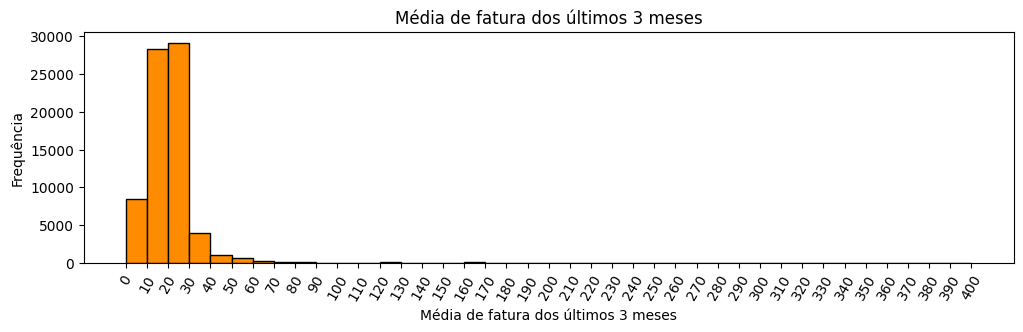

In [29]:
#Histograma
intervalos = list(range(0, 410, 10))
plt.figure(figsize=(12, 3))
plt.hist(df_churn['bill_avg'], color = '#FF8C00', edgecolor = 'black', bins = intervalos)
plt.title('Média de fatura dos últimos 3 meses')
plt.xlabel('Média de fatura dos últimos 3 meses')
plt.ylabel('Frequência')
plt.xticks(intervalos, rotation=60)
plt.show()

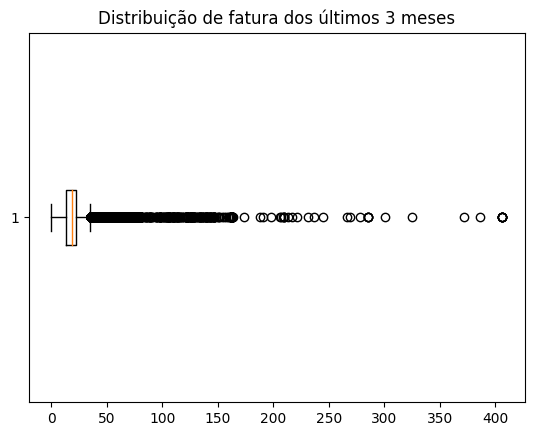

In [30]:
#Boxplot
plt.boxplot(df_churn['bill_avg'], vert = False)
plt.title('Distribuição de fatura dos últimos 3 meses')
plt.show()

- **Interpretação das Estatísticas:**
  - Média e Mediana: **A moda é maior que a mediana, que é maior que a média, indicando uma distribuição assimétrica negativa (à esquerda). Isso indica que a maioria dos valores está concentrada à direita da média.**
  - A maioria das observações estão concentradas nos primeiros intervalos (0-30). Isso indica que a maior parte dos clientes tem faturas relativamente baixas.
  - Cauda Longa à Direita: A cauda mais longa à direita confirma que há valores atípicos de faturas altas, mas a maior concentração de dados está nos valores mais baixos, que puxam a média para baixo, fazendo com ela seja menor que a mediana.
  - Desvio Padrão: O desvio padrão de 13.22 mostra uma variação considerável nas faturas mensais dos clientes.



- **Boxplot:**
  - Há uma presença significativa de valores atípicos além do limite superior, o limite superior em um boxplot é calculado como Q3 (terceiro quartil) + 1,5 * IQR (Intervalo Interquartil). Ele estabelece o limite superior além do qual um valor é considerado um valor atípico.
  - Se retirássemos os outliers para plotagem do histograma, provavelmente a cauda à direita não estaria tão pronunciada, pois verificamos no boxplot que o limite superior está próximo do valor 40.

  - **Os outliers serão tratados no momento da modelagem.**


  ### Para verificar se há diferença estatisticamente significativa entre o grupo que cancelou ou não o produto em relação a coluna 'bill_avg', vamos utilizar o teste Mann-Whitney U.


- Hipótese Nula (H0): As distribuições das duas populações são iguais.
- Hipótese Alternativa (Ha): As distribuições das duas populações são diferentes.
- α=0,05: Vamos utilizar o nível de significância mais comumente usado

In [31]:
# Realizando o teste de Mann-Whitney
estatistica_u, p_valor = mannwhitneyu(churn0['bill_avg'], churn1['bill_avg'], alternative='two-sided') #teste bicaudal

print('Estatística U:', estatistica_u)
print('P-valor:', p_valor)

Estatística U: 624751126.5
P-valor: 1.622546364750945e-13


 Com base nesse resultado (valor de p < 0.05), nós  rejeitamos a hipótese nula de que não há diferença significativa entre as duas amostras.
 - **Os resultados indicam que há uma diferença significativa nas médias de fatura (bill_avg) entre os clientes que deram churn e os que não deram churn, com um p-valor extremamente pequeno confirmando a significância dessa diferença.**

  ## Coluna 'remaining_contract'

In [32]:
#Resumo estatístico
pd.DataFrame(df_churn['reamining_contract'].describe())

,reamining_contract
count,50702.000000
mean,0.716039
std,0.697102
min,0.000000
25%,0.000000
50%,0.570000
75%,1.310000
max,2.920000


In [33]:
df_churn['reamining_contract'].mode()

0    0.0
Name: reamining_contract, dtype: float64

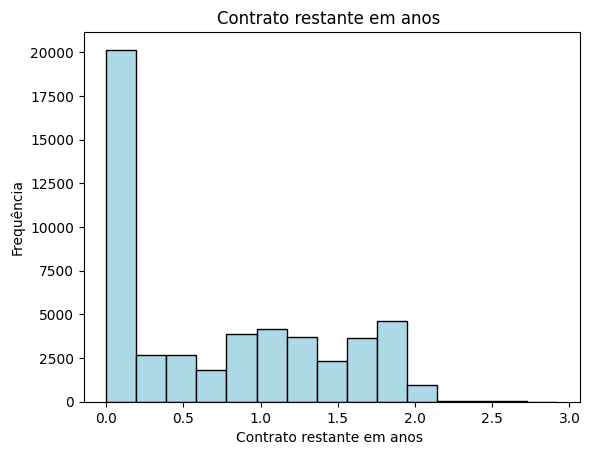

In [34]:
#Histograma
plt.hist(df_churn['reamining_contract'], color = '#ADD8E6', edgecolor = 'black', bins =15)
plt.title('Contrato restante em anos ')
plt.xlabel('Contrato restante em anos ')
plt.ylabel('Frequência')
plt.show()

In [35]:
#Vamos dropar os valores nulos em um novo dataset apenas para geração do boxplot
df_churn_na = df_churn.dropna()

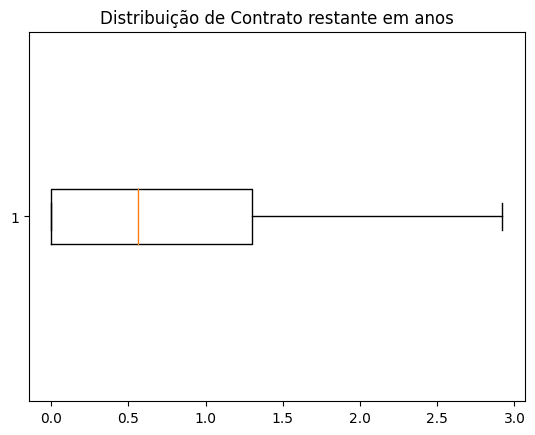

In [36]:
#Boxplot
plt.boxplot(df_churn_na['reamining_contract'], vert=False)
plt.title('Distribuição de Contrato restante em anos')
plt.show()

In [37]:
df_churn.shape

(72274, 11)

In [38]:
df_churn['reamining_contract'].value_counts().head()

reamining_contract
0.00    16363
0.01      470
1.84      348
1.95      340
1.82      338
Name: count, dtype: int64

In [39]:
df_churn_na.shape

(50375, 11)

## Observamos que quase 30% dos valores na coluna reamining_contract são nulos. Um valor nulo nessa coluna indica que o cliente não possui contrato vigente. Além disso, existem mais de 15 mil registros com valores de contrato igual a 0.

## Por que há valores nulos?
- Alguns clientes assinam contratos de 24 ou 12 meses para usar o serviço e ganham um desconto. Se cancelarem antes do fim do contrato, precisam pagar o valor do desconto que foi concedido (uma multa).
- **Já clientes que não possuem contrato, pagam a taxa completa mensalmente.
'remaining_contract nulo' indica que o cliente não tem contrato de longo prazo, e prefere receber o serviço sem desconto, mas podendo cancelar sem multa.**

## Vamos verificar se existe algum cliente que seja NA e que não tenha cancelado o serviço

In [40]:
df_churn['churn'].value_counts()

churn
1    40050
0    32224
Name: count, dtype: int64

In [41]:
df_churn_zero = df_churn[df_churn['churn'] == 0]
df_churn_zero.shape

(32224, 11)

In [42]:
df_churn_zero.isnull().sum()

id                                0
is_tv_subscriber                  0
is_movie_package_subscriber       0
subscription_age                  0
bill_avg                          0
reamining_contract             1853
service_failure_count             0
download_avg                    381
upload_avg                      381
download_over_limit               0
churn                             0
dtype: int64

In [43]:
df_churn.isnull().sum()

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

## Agora vamos verificar quantos clientes que tem tempo restante de contrato igual a zero e cancelaram o serviço.

In [44]:
#Contrato igual a zero e cancelaram o serviço
filtro_1 = (df_churn['reamining_contract'] == 0) & (df_churn['churn'] == 1)

# Contando as linhas que atendem às condições
df_churn[filtro_1].shape


(16291, 11)

In [45]:
# Removendo as linhas onde 'remaining_contract' é NaN
df_churn_clean = df_churn.dropna(subset=['reamining_contract'])

In [46]:
#Contrato igual a zero e cancelaram o serviço
filtro_1 = (df_churn_clean['reamining_contract'] !=0) & (df_churn_clean['churn'] == 1)

# Contando as linhas que atendem às condições
df_churn_clean[filtro_1].shape


(4040, 11)

## 19719 clientes que não possuem contrato cancelaram o serviços;
## 16291 clientes que tem tempo restante de contrato igual a zero e cancelaram o serviço;
## Apenas 4040 clientes não possuem contrato e tempo diferente de 0 cancelaram o serviço;
## Ao somarmos os valores o resultado é 40050, justamente a contagem total de clientes que cancelaram o serviço;
## Portanto, a variável reamining_contract pode ser um forte indicativo de vazamento de dados para nosso target;


## Vamos alterar os valores NA's para 0 para verificar o impacto desta variável no Target, se ela esta fortamente correlacionada com a nossa variável alvo.

In [47]:
df_churn.shape

(72274, 11)

In [48]:
# Substituindo todos os valores NaN por 0
df_churn['reamining_contract'] = df_churn['reamining_contract'].fillna(0)

In [49]:
df_churn.isnull().sum()

id                               0
is_tv_subscriber                 0
is_movie_package_subscriber      0
subscription_age                 0
bill_avg                         0
reamining_contract               0
service_failure_count            0
download_avg                   381
upload_avg                     381
download_over_limit              0
churn                            0
dtype: int64

In [50]:
#Verificando correlação para verificar se há vazamento de dados
df_churn[['reamining_contract', 'churn']].corr()

,reamining_contract,churn
reamining_contract,1.000000,-0.681611
churn,-0.681611,1.000000


## A variável 'remaining_contract' não apresenta alta correlação com o target (correlação > 0,80). Portanto, ela pode ser considerada uma variável útil para nosso modelo, sem risco significativo de vazamento de dados.

In [51]:
#Remoção da coluna id que não será utilizada na modelagem
df_churn = df_churn.drop('id', axis = 1)

In [52]:
df_churn.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,0,0,8.22,0,0.00,0,0.0,0.0,0,1
2,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,0,0,6.87,21,0.00,1,0.0,0.0,0,1
4,0,0,6.39,0,0.00,0,0.0,0.0,0,1


In [53]:
df_churn['service_failure_count'].value_counts()

service_failure_count
0     60407
1      7665
2      2453
3       901
4       395
5       201
6        97
7        58
8        37
9        17
10       15
11        6
12        6
13        5
14        4
16        3
15        2
19        1
18        1
Name: count, dtype: int64

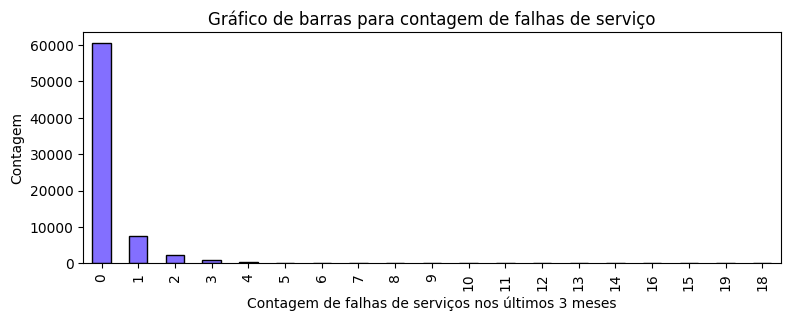

In [54]:
plt.figure(figsize=(9, 3))
df_churn['service_failure_count'].value_counts().plot(kind='bar', edgecolor = 'black', color = '#836FFF')
plt.title('Gráfico de barras para contagem de falhas de serviço')
plt.xlabel('Contagem de falhas de serviços nos últimos 3 meses')
plt.ylabel('Contagem')
plt.show()

- Distribuição das Falhas de Serviço:
  - A maioria dos clientes (60.407) não teve nenhuma falha de serviço nos últimos três meses.
  - Um número significativo de clientes (7.665) teve apenas uma falha de serviço.
  - O número de clientes com duas falhas de serviço é menor (2.453), e continua diminuindo à medida que o número de falhas aumenta.
  - Muito poucos clientes experimentaram três ou mais falhas, com apenas um cliente tendo até 18 falhas.

## Colunas 'download_avg' e 'upload_avg'

In [55]:
pd.DataFrame(df_churn[['upload_avg', 'download_avg']].describe())

,upload_avg,download_avg
count,71893.000000,71893.000000
mean,4.192076,43.689911
std,9.818896,63.405963
min,0.000000,0.000000
25%,0.500000,6.700000
50%,2.100000,27.800000
75%,4.800000,60.500000
max,453.300000,4415.200000


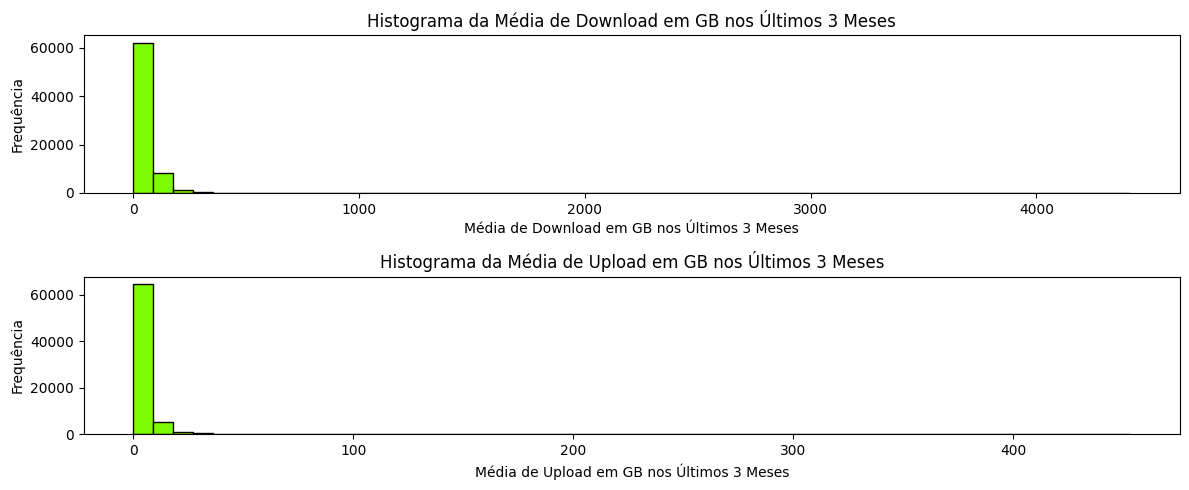

In [56]:
plt.figure(figsize=(12, 5))

# Histograma para 'download_avg'
plt.subplot(2, 1, 1)  # 2 linhas, 1 coluna, posição 1
plt.hist(df_churn['download_avg'], color = '#7CFC00', edgecolor = 'black', bins = 50)
plt.title('Histograma da Média de Download em GB nos Últimos 3 Meses')
plt.xlabel('Média de Download em GB nos Últimos 3 Meses')
plt.ylabel('Frequência')

# Histograma para 'upload_avg'
plt.subplot(2, 1, 2)  # 2 linhas, 1 coluna, posição 2
plt.hist(df_churn['upload_avg'], color = '#7CFC00', edgecolor = 'black', bins = 50)
plt.title('Histograma da Média de Upload em GB nos Últimos 3 Meses')
plt.xlabel('Média de Upload em GB nos Últimos 3 Meses')
plt.ylabel('Frequência')


plt.tight_layout()
plt.show()


In [57]:
df_churn['download_avg'].value_counts().head(15)

download_avg
0.0     10941
0.1       149
0.2       146
2.1       128
0.8       126
2.9       126
2.6       122
0.4       121
0.5       121
13.0      119
4.5       119
6.0       117
7.7       117
0.3       117
8.2       116
Name: count, dtype: int64

In [58]:
df_churn['upload_avg'].value_counts().head(15)

upload_avg
0.0    11674
0.4     1423
0.5     1383
0.2     1368
0.6     1355
0.3     1331
0.9     1289
0.7     1282
0.8     1276
0.1     1275
1.0     1244
1.1     1191
1.3     1150
1.2     1135
1.4     1105
Name: count, dtype: int64

In [59]:
#Verificando valores nulos
df_churn.isnull().sum()

is_tv_subscriber                 0
is_movie_package_subscriber      0
subscription_age                 0
bill_avg                         0
reamining_contract               0
service_failure_count            0
download_avg                   381
upload_avg                     381
download_over_limit              0
churn                            0
dtype: int64

In [60]:
df_churn.shape

(72274, 10)

### Como são apenas 381 linhas com valores nulos em um dataset de mais de 70 mil linhas, vamos apenas remover estes valores do dataset.

In [61]:
# Removendo todas as linhas que possui valores nulos
df_churn_cleaned = df_churn.dropna()

In [62]:
df_churn_cleaned.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,0,0,8.22,0,0.00,0,0.0,0.0,0,1
2,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,0,0,6.87,21,0.00,1,0.0,0.0,0,1
4,0,0,6.39,0,0.00,0,0.0,0.0,0,1


In [63]:
df_churn_cleaned.isnull().sum()

is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64

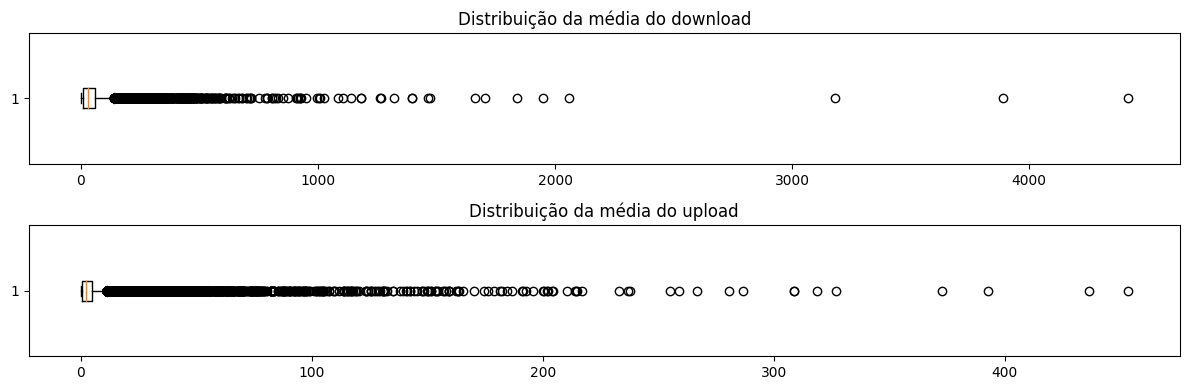

In [64]:
#Boxplot das duas variáveis
fig, ax = plt.subplots(2, 1, figsize=(12, 4))  # 2 linhas, 1 coluna

# Boxplot para 'download_avg'
ax[0].boxplot(df_churn_cleaned['download_avg'], vert=False)
ax[0].set_title('Distribuição da média do download')

# Boxplot para 'upload_avg''
ax[1].boxplot(df_churn_cleaned['upload_avg'], vert=False)
ax[1].set_title('Distribuição da média do upload')


plt.tight_layout()
plt.show()

- Download:
  - A maioria dos usuários tem uma média de download muito baixa, com um pico significativo próximo de zero.
  - Existem valores outliers, com alguns usuários apresentando médias de download superiores a 1.000 GB.
  - Valor mais frequente: 0.0 GB (10.941 usuários)
  - A maioria dos dados está concentrada perto de valores baixos, com muitos outliers em valores altos.

- Upload:
  - Similar ao download, a maioria dos usuários tem uma média de upload baixa.
  - Há menos outliers extremos em comparação com o download, mas ainda existem usuários com médias de upload bem superiores a 100 GB.
  - Valor mais frequente: 0.0 GB (11.674 usuários)
  - Apresenta um padrão semelhante ao download, com a maioria dos dados concentrada em valores baixos e alguns outliers significativos.

- Tanto a média de upload quanto a de download são altamente desbalanceadas, com a maioria dos usuários apresentando valores baixos e poucos usuários com valores extremamente altos.
- Existem outliers significativos em ambas as distribuições, indicando que alguns usuários consomem muito mais dados que a média.


## 'Coluna download_over_limit'

In [65]:
df_churn_cleaned['download_over_limit'].value_counts().sort_index()

download_over_limit
0    67992
1      766
2      560
3      498
4      456
5      429
6      688
7      504
Name: count, dtype: int64

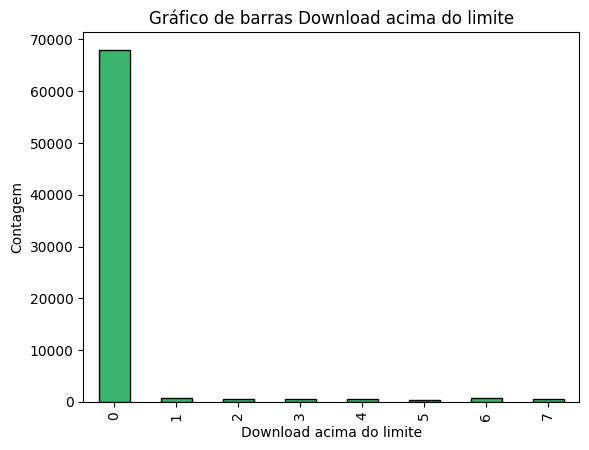

In [66]:
df_churn_cleaned['download_over_limit'].value_counts().sort_index().plot(kind='bar', color = '#3CB371', edgecolor = 'black')
plt.title('Gráfico de barras Download acima do limite')
plt.xlabel('Download acima do limite')
plt.ylabel('Contagem')
plt.show()

- A grande maioria dos usuários (67.992) não ultrapassa o limite de download.
- Quando os limites são ultrapassados, a frequência de tais ocorrências é baixa. Mesmo o maior valor, 7 vezes, foi registrado por apenas 504 usuários.

In [67]:
df_churn_cleaned['churn'].value_counts()

churn
1    40050
0    31843
Name: count, dtype: int64

In [68]:
df_churn_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71893 entries, 0 to 72273
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_tv_subscriber             71893 non-null  int64  
 1   is_movie_package_subscriber  71893 non-null  int64  
 2   subscription_age             71893 non-null  float64
 3   bill_avg                     71893 non-null  int64  
 4   reamining_contract           71893 non-null  float64
 5   service_failure_count        71893 non-null  int64  
 6   download_avg                 71893 non-null  float64
 7   upload_avg                   71893 non-null  float64
 8   download_over_limit          71893 non-null  int64  
 9   churn                        71893 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 6.0 MB


In [69]:
#Removendo valores menores que zero
#Criando uma máscara booleana para identificar linhas com valores menores que 0
mask = (df_churn_cleaned >= 0).all(axis=1)

In [70]:
# Aplicar a máscara para filtrar as linhas
df_churn_cleaned = df_churn_cleaned[mask]

In [71]:
df_churn_cleaned.shape

(71892, 10)

In [72]:
df_churn_cleaned.corr()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
is_tv_subscriber,1.000000,0.337035,0.089961,-0.076243,0.257414,-0.016033,0.131649,0.065785,-0.103816,-0.329403
is_movie_package_subscriber,0.337035,1.000000,0.134524,-0.021245,0.345521,0.013801,0.160588,0.093248,-0.026189,-0.307783
subscription_age,0.089961,0.134524,1.000000,0.060908,-0.016857,0.002522,0.069329,0.030272,0.023291,-0.126659
bill_avg,-0.076243,-0.021245,0.060908,1.000000,-0.059434,0.099880,0.431677,0.334235,-0.235040,-0.027533
reamining_contract,0.257414,0.345521,-0.016857,-0.059434,1.000000,-0.007216,0.203304,0.103781,-0.120202,-0.681627
service_failure_count,-0.016033,0.013801,0.002522,0.099880,-0.007216,1.000000,0.080482,0.070698,0.004581,0.019685
download_avg,0.131649,0.160588,0.069329,0.431677,0.203304,0.080482,1.000000,0.554436,-0.114322,-0.298063
upload_avg,0.065785,0.093248,0.030272,0.334235,0.103781,0.070698,0.554436,1.000000,-0.069193,-0.162687
download_over_limit,-0.103816,-0.026189,0.023291,-0.235040,-0.120202,0.004581,-0.114322,-0.069193,1.000000,0.157630
churn,-0.329403,-0.307783,-0.126659,-0.027533,-0.681627,0.019685,-0.298063,-0.162687,0.157630,1.000000


## Salvando o dataset limpo em disco

In [73]:
df_churn_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71892 entries, 0 to 72273
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_tv_subscriber             71892 non-null  int64  
 1   is_movie_package_subscriber  71892 non-null  int64  
 2   subscription_age             71892 non-null  float64
 3   bill_avg                     71892 non-null  int64  
 4   reamining_contract           71892 non-null  float64
 5   service_failure_count        71892 non-null  int64  
 6   download_avg                 71892 non-null  float64
 7   upload_avg                   71892 non-null  float64
 8   download_over_limit          71892 non-null  int64  
 9   churn                        71892 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 6.0 MB


In [74]:
df_churn_cleaned.describe()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,71892.000000,71892.000000,71892.00000,71892.000000,71892.000000,71892.000000,71892.000000,71892.000000,71892.000000,71892.000000
mean,0.815237,0.334071,2.45552,19.017109,0.497618,0.275677,43.690066,4.192116,0.208716,0.557072
std,0.388108,0.471668,2.02685,13.188442,0.665758,0.818539,63.406391,9.818959,0.999654,0.496736
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.94000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,1.000000,0.000000,1.98000,19.000000,0.000000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.000000,1.000000,3.30000,22.000000,1.030000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.000000,1.000000,12.80000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


In [75]:
# Salvando o DataFrame como um arquivo CSV
df_churn_cleaned.to_csv('df_churn_cleaned.csv', index=False)

# Os modelos de aprendizado supervisionado e não supervisionado foram desenvolvidos em um segundo e terceiro notebook.